# Problem Statement

Mr Chukwudi and Sons Automobile has just recruited you to help predict the best price to sell his cars. The company has recorded significant losses in the last 4 years because there is no scientific basis of determining the best price to sell his vehicles. Your task is to develop an efficient Machine Learning algorithm to predict the best prices to sell the vehicles following sound Data Science/Artificial Intelligence principles, Data exploration and visualization techniques

### Upload Required Libraries

In [26]:
import numpy as np   
import pandas as pd
import os
import re

import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

### Importing data

In [2]:
## Load the xlsx file available in the working or specified directory
#os.chdir('C:\\GL Class\DSBA - Python\Predictive Modeling\Week 1')
df_train = pd.read_csv("train_car0408.csv")
df_test = pd.read_csv("test_car0408.csv")

In [3]:
solution_df = pd.DataFrame(df_test['ID'])
solution_df

,ID
0,2
1,6
2,7
3,11
4,12
...,...
110581,335094
110582,335103
110583,335107
110584,335108


In [4]:
df_train.shape

(224537, 19)

In [6]:
df_train.columns

Index(['ID', 'seller_type', 'country_of_use', 'scrapped_date', 'postal_code',
       'car_name', 'car_type', 'year_of_registration', 'registration_month',
       'horse_power', 'mileage', 'gas_type', 'car_brand', 'repair_status',
       'gear_type', 'date_of_advert', 'last_advert_online', 'model',
       'naira_price'],
      dtype='object')

In [5]:
df_test.shape

(110586, 19)

In [8]:
df_test.columns

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
110581   NaN
110582   NaN
110583   NaN
110584   NaN
110585   NaN
Name: Unnamed: 18, Length: 110586, dtype: float64

In [9]:
df_test = df_test.drop(['Unnamed: 18'], axis=1)

In [10]:
df = pd.concat([df_train, df_test], axis=0)

In [11]:
#df.columns = churn.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and').str.replace('[', '_').str.replace(']', '').str.replace('-', '_').str.replace('.', '')
df.columns = df.columns.str.strip().str.replace(' ', '_')

### EDA

In [12]:
# Check top few records to get a feel of the data structure
df.head()

,ID,seller_type,country_of_use,scrapped_date,postal_code,car_name,car_type,year_of_registration,registration_month,horse_power,mileage,gas_type,car_brand,repair_status,gear_type,date_of_advert,last_advert_online,model,naira_price
0,1,private,london,24/03/2016,66954,A5_Sportback_2.7_Tdi,coupé,2013,5,190,201125.0,diesel,audi,Yes,manuell,24/03/2016,07/04/2016,NaN,6588000
1,3,private,london,17/03/2016,91074,GOLF_4_1_4__3TÜRER,small car,2003,6,75,241350.0,gasoline,volkswagen,No,manuell,17/03/2016,17/03/2016,golf,540000
2,4,private,london,31/03/2016,60437,Skoda_Fabia_1.4_TDI_PD_Classic,small car,2010,7,69,144810.0,diesel,skoda,No,manuell,31/03/2016,06/04/2016,fabia,1296000
3,5,private,london,04/04/2016,33775,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,limousine,1997,10,102,241350.0,gasoline,bmw,Yes,manuell,04/04/2016,06/04/2016,3er,234000
4,8,private,london,17/03/2016,27472,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,small car,2000,0,101,241350.0,NaN,volkswagen,NaN,manuell,17/03/2016,31/03/2016,golf,359640



#### Shape

In [13]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  335123 
no. of columns:  19



#### Dropping "id" as it different for every row and will be a noise for while building models

In [14]:
df.ID.nunique()

335123

drop the id column as it is useless for the model

In [15]:
df = df.drop(['ID','car_name'], axis=1)

In [16]:
df.head()

,seller_type,country_of_use,scrapped_date,postal_code,car_type,year_of_registration,registration_month,horse_power,mileage,gas_type,car_brand,repair_status,gear_type,date_of_advert,last_advert_online,model,naira_price
0,private,london,24/03/2016,66954,coupé,2013,5,190,201125.0,diesel,audi,Yes,manuell,24/03/2016,07/04/2016,NaN,6588000
1,private,london,17/03/2016,91074,small car,2003,6,75,241350.0,gasoline,volkswagen,No,manuell,17/03/2016,17/03/2016,golf,540000
2,private,london,31/03/2016,60437,small car,2010,7,69,144810.0,diesel,skoda,No,manuell,31/03/2016,06/04/2016,fabia,1296000
3,private,london,04/04/2016,33775,limousine,1997,10,102,241350.0,gasoline,bmw,Yes,manuell,04/04/2016,06/04/2016,3er,234000
4,private,london,17/03/2016,27472,small car,2000,0,101,241350.0,NaN,volkswagen,NaN,manuell,17/03/2016,31/03/2016,golf,359640


#### Data type of data features

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335123 entries, 0 to 110585
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   seller_type           335123 non-null  object
 1   country_of_use        335123 non-null  object
 2   scrapped_date         335123 non-null  object
 3   postal_code           335123 non-null  object
 4   car_type              293392 non-null  object
 5   year_of_registration  335123 non-null  object
 6   registration_month    335123 non-null  object
 7   horse_power           335123 non-null  object
 8   mileage               335120 non-null  object
 9   gas_type              311089 non-null  object
 10  car_brand             335122 non-null  object
 11  repair_status         279793 non-null  object
 12  gear_type             321538 non-null  object
 13  date_of_advert        335122 non-null  object
 14  last_advert_online    335120 non-null  object
 15  model            

### Checking values for categorical variables

In [93]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

SELLER_TYPE :  13
25/03/2016 19:52         1
24/03/2016 16:52         1
kleinwagen               1
27/03/2016 16:52         1
26/03/2016 18:25         1
13/03/2016 15:52         1
09/03/2016 17:37         1
25/03/2016 11:45         1
20/03/2016 15:30         1
16/03/2016 20:52         1
07/03/2016 10:57         1
03/04/2016 22:52         1
private             335111
Name: seller_type, dtype: int64


COUNTRY_OF_USE :  13
2002                                                                       1
Ford_Fiesta_1.25_SYNC_Edition_82PS__Unfallfrei_mit_Garantie                1
Golf_3_GT_Special_mit_Tuning                                               1
Mercedes_Benz_CLA_200_Urban                                                1
Mercedes_Benz_280SL_Pagode                                                 1
Renault_Clio_1.6_Automatik_RXE_Tuev_Neu                                    1
Mercedes_A_160_Automatik                                                   1
Prius__Hybrid__+_1A_TOP_+_VOLLAUSSTAT

### Data Cleaning

In [ ]:
# dropping columns with only single value
df = df.drop(['seller_type','country_of_use'], axis=1)

In [ ]:
df['scrapped_date'] = df['scrapped_date'].replace('NaT',np.nan)

In [ ]:
df['car_type'] = df['car_type'].replace(dict.fromkeys(['102','125000','control','test','privat'],'other'))

In [62]:
def identify_year(x):
    r = re.compile(r"^\d{4}$")
    #print(x)
    if x is not None:
        match = r.search(x)
        #print(match)
        if match:
            return x
        else:
            return np.nan
    else:
        return np.nan

In [63]:
df['year_of_registration'] = df['year_of_registration'].apply(lambda x: identify_year(x))

TypeError: expected string or bytes-like object

In [91]:
def clean_reg_month(x):
    if type(x) == int:
        x = str(x)
    r = re.compile(r"(^0?[1-9]$)|(^1[0-2]$)")
    match = r.search(x)
    if match:
        #print('month')
        return x
    else:
        #print('not a month')
        return np.nan    

In [92]:
df['registration_month'] = df['registration_month'].apply(lambda x:clean_reg_month(x))

Change the data types of these 3 features 

In [21]:
df.columns

Index(['seller_type', 'country_of_use', 'scrapped_date', 'postal_code',
       'car_type', 'year_of_registration', 'registration_month', 'horse_power',
       'mileage', 'gas_type', 'car_brand', 'repair_status', 'gear_type',
       'date_of_advert', 'last_advert_online', 'model', 'naira_price'],
      dtype='object')

In [23]:
dec = ["horse_power","mileage"]
date = ['scrapped_date','date_of_advert','last_advert_online']

In [24]:
for i in dec:
    df[i]=df[i].astype("float")

ValueError: could not convert string to float: 'renault'

In [ ]:
for i in date:
    df[i]= pd.to_datetime(df[i])

In [564]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59130 entries, 0 to 5614
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                59130 non-null  object 
 1   model                59130 non-null  object 
 2   Location             59124 non-null  object 
 3   Distance             57791 non-null  float64
 4   Owner_Type           59130 non-null  object 
 5   Age_of_car           59130 non-null  int64  
 6   engine_displacement  59130 non-null  int64  
 7   engine_power         57523 non-null  float64
 8   body_type            4558 non-null   object 
 9   Vroom_Audit_Rating   59130 non-null  object 
 10  transmission         59130 non-null  object 
 11  door_count           59130 non-null  object 
 12  seat_count           59130 non-null  object 
 13  fuel_type            59130 non-null  object 
 14  Price                53515 non-null  float64
dtypes: float64(3), int64(2), object(10)
m

#### Making different list for categorical columns and numerical columns


In [565]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num) 

['Maker', 'model', 'Location', 'Owner_Type', 'body_type', 'Vroom_Audit_Rating', 'transmission', 'door_count', 'seat_count', 'fuel_type']
['Distance', 'Age_of_car', 'engine_displacement', 'engine_power', 'Price']


#### Describe for numerical and categorical columns

In [566]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Distance,57791.0,9.467385e+04,278890.924188,0.0,15360.00,65300.00,135112.000,9899800.00
Age_of_car,59130.0,8.584340e+00,4.658657,3.0,5.00,8.00,11.000,85.00
engine_displacement,59130.0,1.901370e+03,1487.932696,14.0,1395.00,1896.00,1995.000,32000.00
engine_power,57523.0,1.003561e+02,45.345649,10.0,73.00,91.00,125.000,968.00
Price,53515.0,1.098084e+06,844156.530729,3.0,505181.25,885455.25,1477828.875,22120775.25


In [567]:
df[cat].describe().T

,count,unique,top,freq
Maker,59130,8,skoda,23814
model,59130,23,octavia,13952
Location,59124,11,Kochi,5507
Owner_Type,59130,4,First,14897
body_type,4558,2,compact,4548
Vroom_Audit_Rating,59130,5,8,11906
transmission,59130,2,man,40627
door_count,59130,7,4,37391
seat_count,59130,10,5,42924
fuel_type,59130,2,diesel,30442


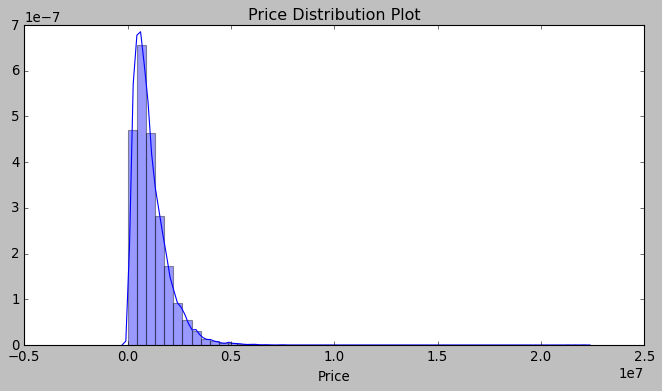

In [568]:
#Visualizing the distribution of orders
plt.figure(figsize=(10,5))

plt.title('Price Distribution Plot')
sns.distplot(df['Price'])
plt.show()

* Dependent variable Price is showing right skewed distribution

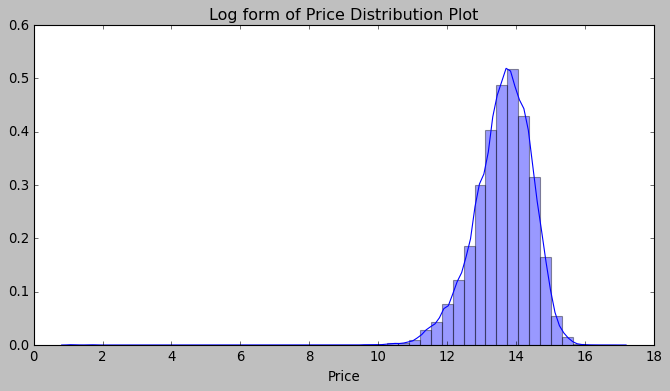

In [569]:
#Visualizing the distribution of orders
plt.figure(figsize=(10,5))

plt.title('Log form of Price Distribution Plot')
sns.distplot(np.log(df['Price']))
plt.show()

**log of Price addresses skewness in distribution 

### unique values for categorical variables

In [570]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

MAKER :  8
maserati       43
fiat         2045
hyundai      2500
nissan       6082
bmw          7882
audi         8073
toyota       8691
skoda       23814
Name: Maker, dtype: int64


MODEL :  23
tt           1006
juke         1056
citigo       1218
q7           1368
roomster     1462
rapid        1568
aygo         1635
avensis      1697
auris        1842
micra        1871
coupe        1884
q3           1915
panda        1964
yeti         2078
x5           2161
q5           2248
i30          2276
x1           2660
x3           3061
qashqai      3155
yaris        3517
superb       3536
octavia     13952
Name: model, dtype: int64


LOCATION :  11
Ahmedabad     5298
Hyderabad     5320
Chennai       5324
Pune          5336
Delhi         5339
Jaipur        5362
Mumbai        5375
Kolkata       5383
Bangalore     5409
Coimbatore    5471
Kochi         5507
Name: Location, dtype: int64


OWNER_TYPE :  4
Second            14700
Fourth & Above    14725
Third             14808
First             14

#### Data Cleaning

In [571]:
#df['food_category'] = df['food_category'].replace({'Fish': 'Seafood'})

In [572]:
#df['food_category'].value_counts()

In [573]:
# Are there any missing values ?
df.isnull().sum()

Maker                      0
model                      0
Location                   6
Distance                1339
Owner_Type                 0
Age_of_car                 0
engine_displacement        0
engine_power            1607
body_type              54572
Vroom_Audit_Rating         0
transmission               0
door_count                 0
seat_count                 0
fuel_type                  0
Price                   5615
dtype: int64

In [574]:
df.isnull().sum()/len(df)

Maker                  0.000000
model                  0.000000
Location               0.000101
Distance               0.022645
Owner_Type             0.000000
Age_of_car             0.000000
engine_displacement    0.000000
engine_power           0.027177
body_type              0.922916
Vroom_Audit_Rating     0.000000
transmission           0.000000
door_count             0.000000
seat_count             0.000000
fuel_type              0.000000
Price                  0.094960
dtype: float64

In [575]:
# Dropping body_type as it has 92% missing values
df = df.drop(['body_type'], axis=1)

In [576]:
cat.remove('body_type')

In [577]:
## Are there any duplicate records

# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 122


,Maker,model,Location,Distance,Owner_Type,Age_of_car,engine_displacement,engine_power,Vroom_Audit_Rating,transmission,door_count,seat_count,fuel_type,Price
4978,toyota,aygo,Kochi,10.0,Fourth & Above,4,998,51.0,4,man,4,5,petrol,633272.25
8605,hyundai,i30,Kochi,10.0,Third,4,1582,NaN,8,auto,None,5,diesel,1499844.75
11576,toyota,aygo,Jaipur,10.0,First,4,998,51.0,7,man,4,5,petrol,633294.75
12665,skoda,octavia,Kochi,3188255.0,First,6,1600,75.0,8,man,None,None,petrol,247039.50
13485,nissan,juke,Kochi,1.0,First,4,1461,81.0,7,man,4,5,diesel,1057505.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4626,fiat,panda,Coimbatore,33900.0,First,5,1242,51.0,4,man,4,5,petrol,NaN
4859,toyota,yaris,Pune,7000.0,Second,4,1364,66.0,6,man,None,None,diesel,NaN
5177,toyota,auris,Delhi,17350.0,First,5,1998,91.0,7,man,None,None,diesel,NaN
5333,bmw,x1,Bangalore,214313.0,First,8,1995,130.0,8,man,4,5,diesel,NaN


## Imputation of all missing values with the best possible option

In [578]:
df.Location.mode()

0    Kochi
dtype: object

In [579]:
df.Location = df.Location.fillna('Kochi')

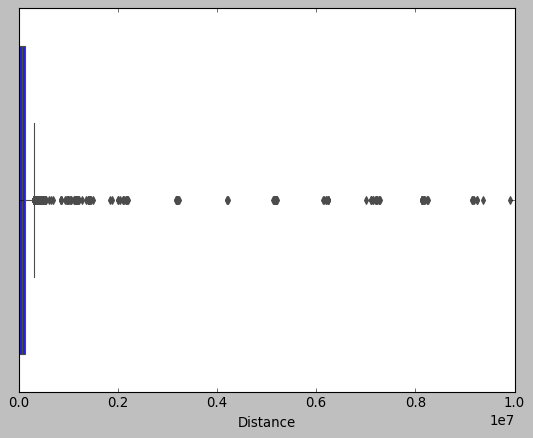

In [580]:
sns.boxplot(df['Distance'])

#### since there are a lot of outlier we will use median to impute values


In [581]:
df.Distance.median()

65300.0

In [582]:
df[df.Distance.isnull()]

,Maker,model,Location,Distance,Owner_Type,Age_of_car,engine_displacement,engine_power,Vroom_Audit_Rating,transmission,door_count,seat_count,fuel_type,Price
0,skoda,octavia,Ahmedabad,NaN,Second,55,1964,147.0,8,man,None,None,petrol,543764.25
53,skoda,octavia,Pune,NaN,Fourth & Above,11,8200,103.0,4,auto,None,None,petrol,457994.25
73,skoda,roomster,Chennai,NaN,Fourth & Above,12,1900,NaN,6,man,None,None,diesel,313656.75
87,skoda,octavia,Pune,NaN,Second,15,1900,81.0,4,man,None,None,petrol,305326.50
106,skoda,octavia,Ahmedabad,NaN,Second,19,157,NaN,6,man,None,None,petrol,138231.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,skoda,octavia,Ahmedabad,NaN,Fourth & Above,11,1900,77.0,5,man,None,None,diesel,NaN
5445,skoda,octavia,Delhi,NaN,Third,18,1900,NaN,5,auto,None,None,petrol,NaN
5456,skoda,octavia,Kochi,NaN,Third,15,1900,81.0,7,man,None,None,petrol,NaN
5470,skoda,octavia,Delhi,NaN,First,12,100,NaN,5,man,None,None,petrol,NaN


In [583]:
#df[df.week==35.0]["final_price"].median()
df["Distance"].median()

65300.0

In [584]:
df.Distance=df.Distance.fillna(df["Distance"].median())

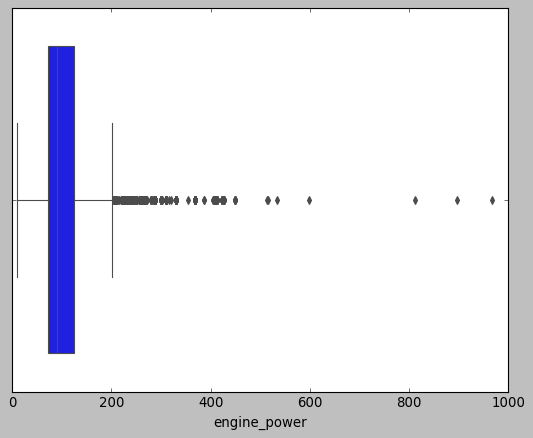

In [585]:
sns.boxplot(df['engine_power'])

In [586]:
df.engine_power.median()

91.0

In [587]:
df[df.engine_power.isnull()]

,Maker,model,Location,Distance,Owner_Type,Age_of_car,engine_displacement,engine_power,Vroom_Audit_Rating,transmission,door_count,seat_count,fuel_type,Price
38,nissan,micra,Pune,110000.0,Fourth & Above,17,1000,NaN,4,man,None,None,petrol,99926.25
39,audi,coupe,Pune,10130.0,Third,6,1968,NaN,8,auto,None,4,diesel,2212746.75
73,skoda,roomster,Chennai,65300.0,Fourth & Above,12,1900,NaN,6,man,None,None,diesel,313656.75
82,nissan,qashqai,Jaipur,10.0,First,4,1461,NaN,7,man,None,5,diesel,1547448.00
90,hyundai,coupe,Mumbai,74556.0,First,13,2656,NaN,8,man,None,None,petrol,402201.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5470,skoda,octavia,Delhi,65300.0,First,12,100,NaN,5,man,None,None,petrol,NaN
5486,skoda,superb,Chennai,293000.0,Second,15,1896,NaN,7,man,None,None,diesel,NaN
5498,bmw,x3,Mumbai,65300.0,Fourth & Above,14,32000,NaN,7,auto,None,None,petrol,NaN
5547,hyundai,i30,Hyderabad,10.0,Third,4,1368,NaN,6,man,None,5,petrol,NaN


In [588]:
#df[df.week==35.0]["final_price"].median()
df["engine_power"].median()

91.0

In [589]:
df.engine_power=df.engine_power.fillna(df["engine_power"].median())

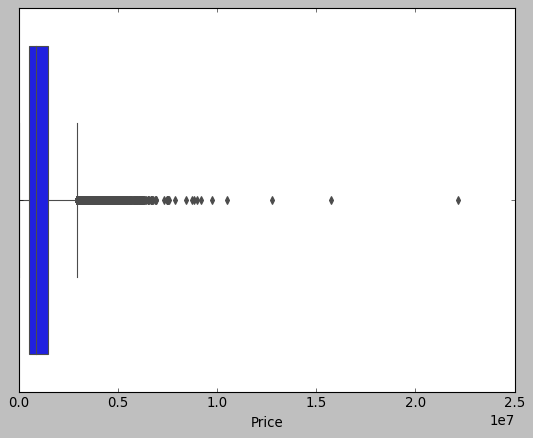

In [590]:
sns.boxplot(df['Price'])

In [591]:
df.Price=df.Price.fillna(df["Price"].median())

In [592]:
df.isnull().sum()

Maker                  0
model                  0
Location               0
Distance               0
Owner_Type             0
Age_of_car             0
engine_displacement    0
engine_power           0
Vroom_Audit_Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
Price                  0
dtype: int64

In [593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59130 entries, 0 to 5614
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                59130 non-null  object 
 1   model                59130 non-null  object 
 2   Location             59130 non-null  object 
 3   Distance             59130 non-null  float64
 4   Owner_Type           59130 non-null  object 
 5   Age_of_car           59130 non-null  int64  
 6   engine_displacement  59130 non-null  int64  
 7   engine_power         59130 non-null  float64
 8   Vroom_Audit_Rating   59130 non-null  object 
 9   transmission         59130 non-null  object 
 10  door_count           59130 non-null  object 
 11  seat_count           59130 non-null  object 
 12  fuel_type            59130 non-null  object 
 13  Price                59130 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 6.8+ MB


### Univariate Analysis

In [594]:
print(num)

['Distance', 'Age_of_car', 'engine_displacement', 'engine_power', 'Price']


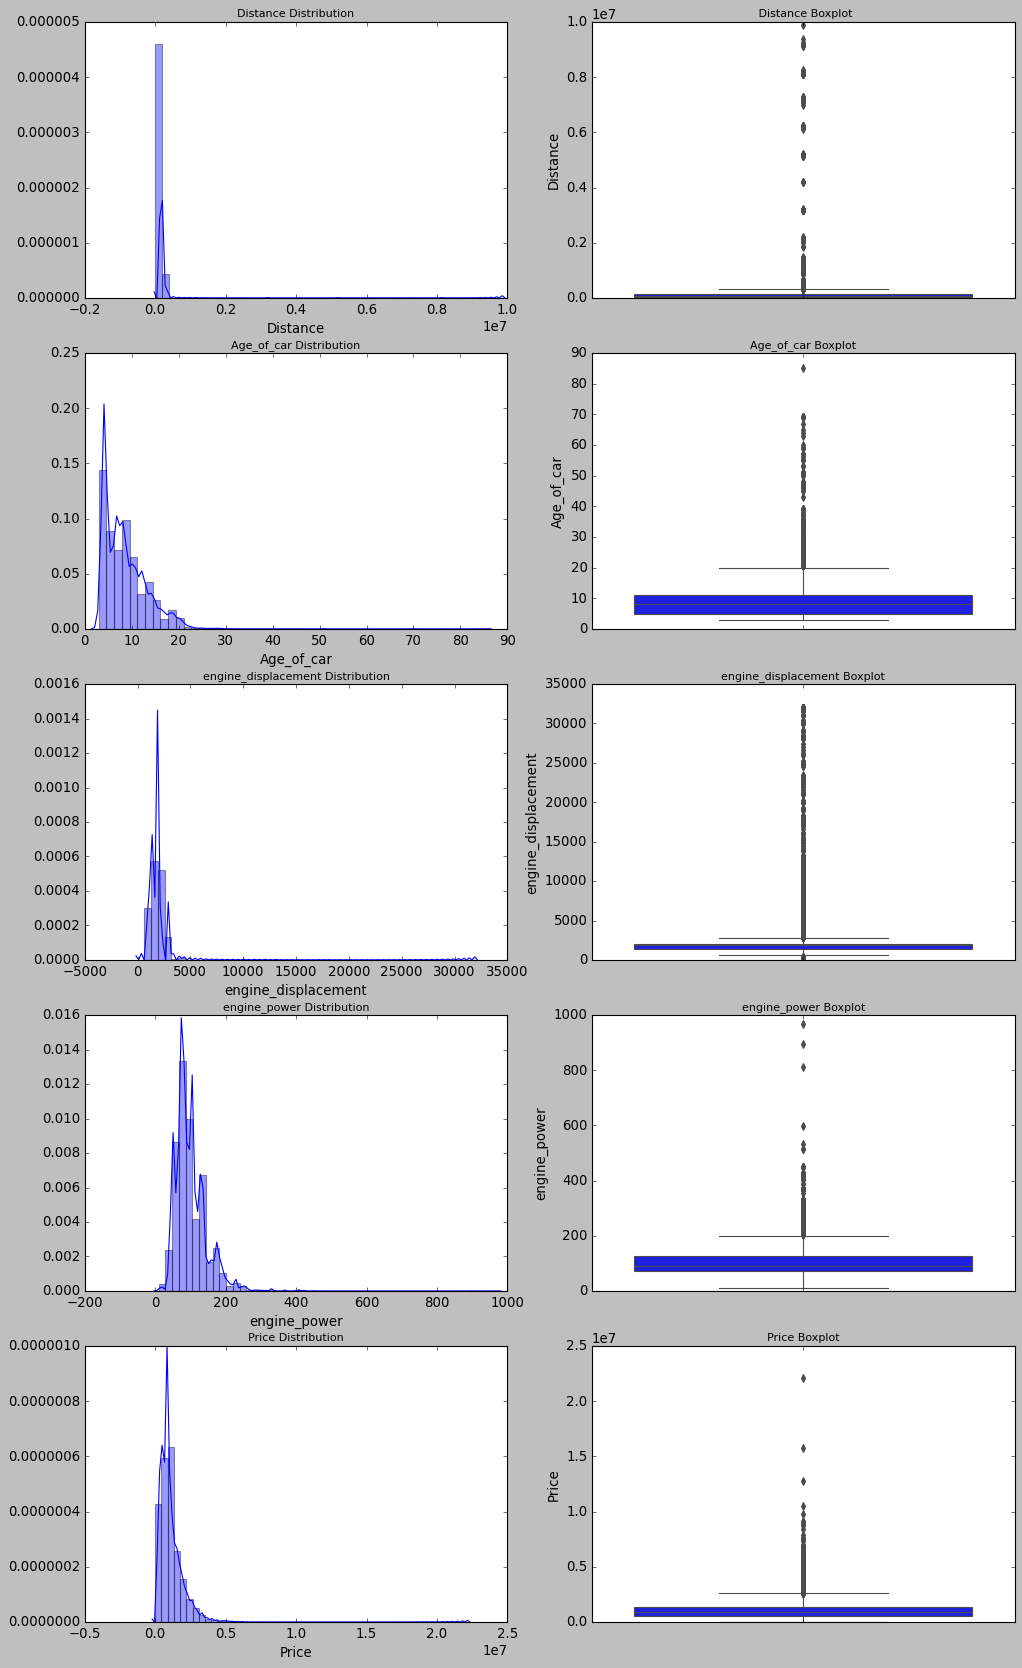

In [595]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15,25)

a = sns.distplot(df['Distance'] , ax=axes[0][0])
a.set_title("Distance Distribution",fontsize=10)

a = sns.boxplot(df['Distance'] , orient = "v" , ax=axes[0][1])
a.set_title(" Distance Boxplot",fontsize=10)

a = sns.distplot(df['Age_of_car'] , ax=axes[1][0])
a.set_title("Age_of_car Distribution",fontsize=10)

a = sns.boxplot(df['Age_of_car'] , orient = "v" , ax=axes[1][1])
a.set_title("Age_of_car Boxplot",fontsize=10)


a = sns.distplot(df['engine_displacement'] , ax=axes[2][0])
a.set_title("engine_displacement Distribution",fontsize=10)

a = sns.boxplot(df['engine_displacement'] , orient = "v" , ax=axes[2][1])
a.set_title("engine_displacement Boxplot",fontsize=10)

a = sns.distplot(df['engine_power'] , ax=axes[3][0])
a.set_title("engine_power Distribution",fontsize=10)

a = sns.boxplot(df['engine_power'] , orient = "v" , ax=axes[3][1])
a.set_title("engine_power Boxplot",fontsize=10)

a = sns.distplot(df['Price'] , ax=axes[4][0])
a.set_title("Price Distribution",fontsize=10)

a = sns.boxplot(df['Price'] , orient = "v" , ax=axes[4][1])
a.set_title("Price Boxplot",fontsize=10)

plt.show()

There are some possible outliers and the same would be treated accordingly

###  Bivariate and Multivariate Analysis

In [596]:
print(cat)

['Maker', 'model', 'Location', 'Owner_Type', 'Vroom_Audit_Rating', 'transmission', 'door_count', 'seat_count', 'fuel_type']


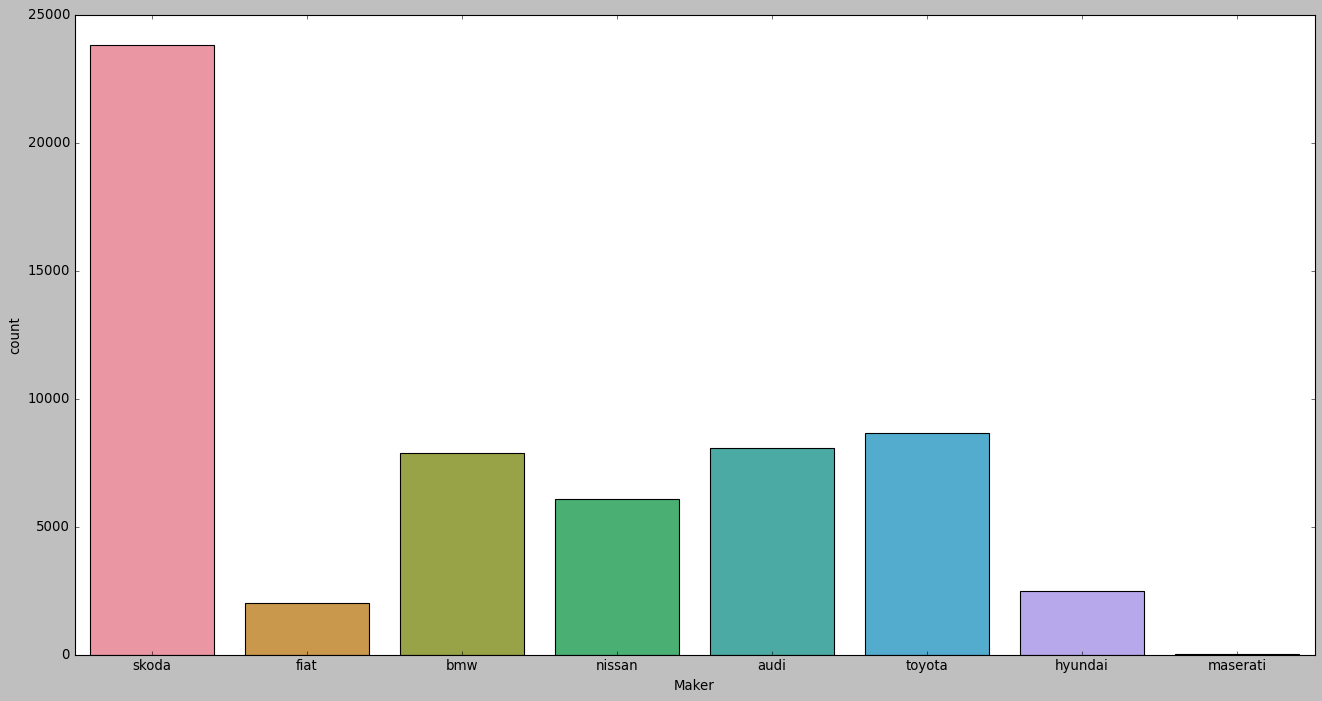

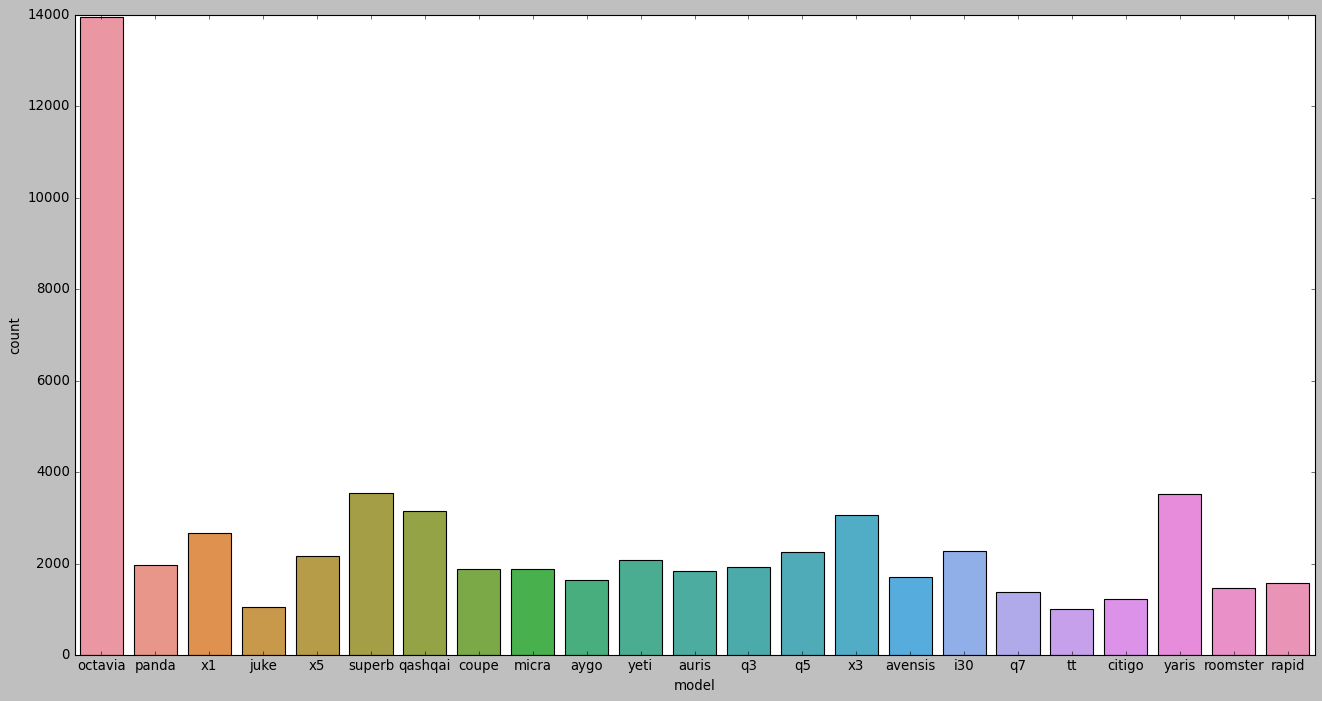

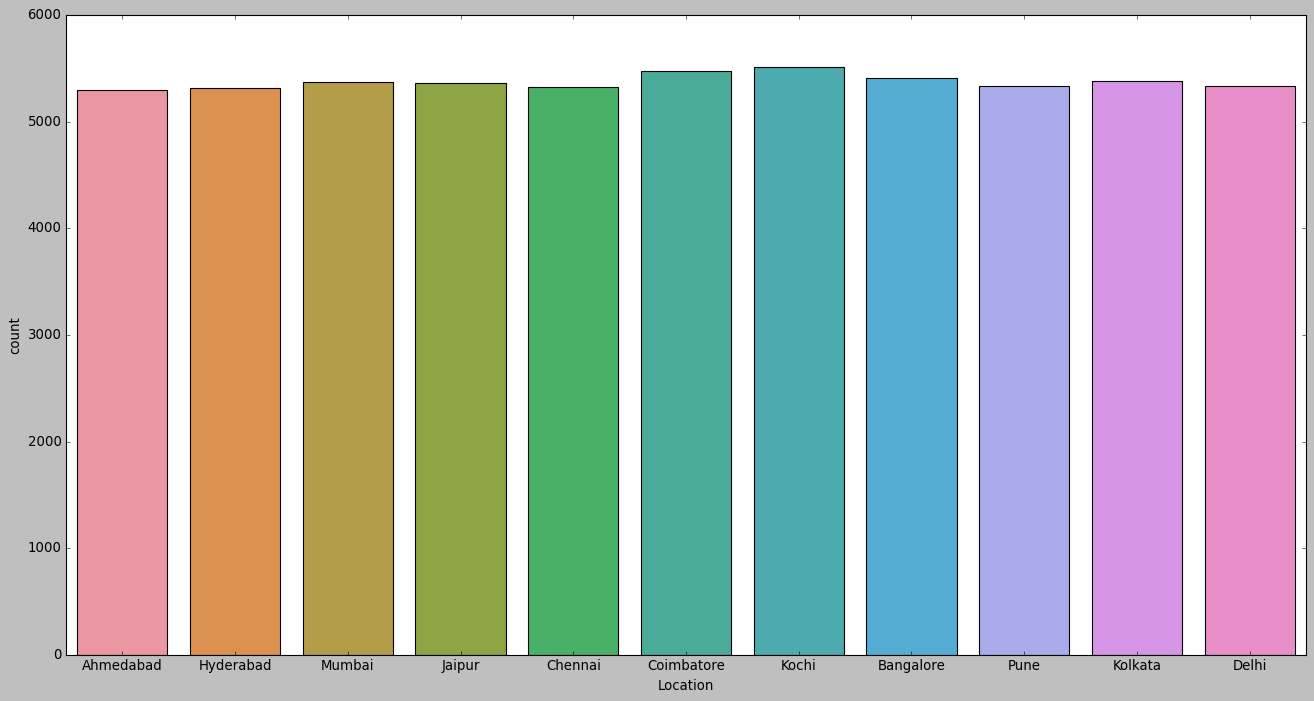

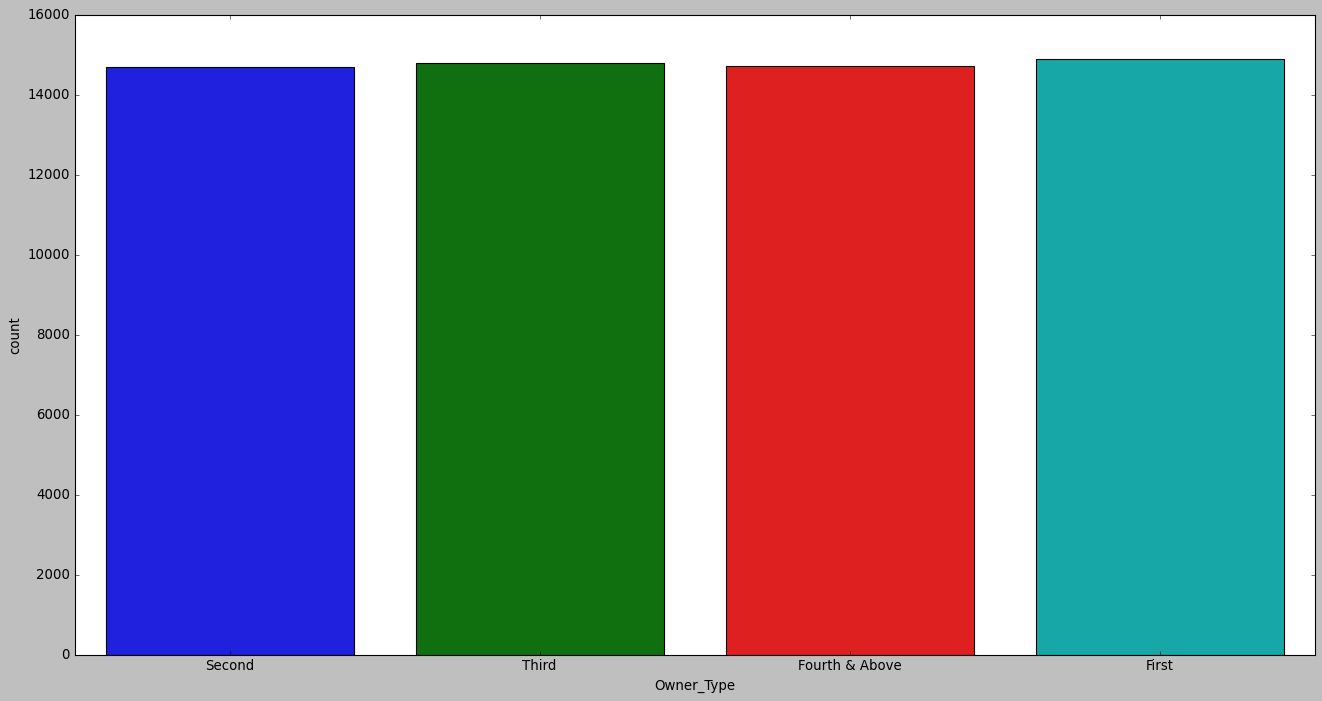

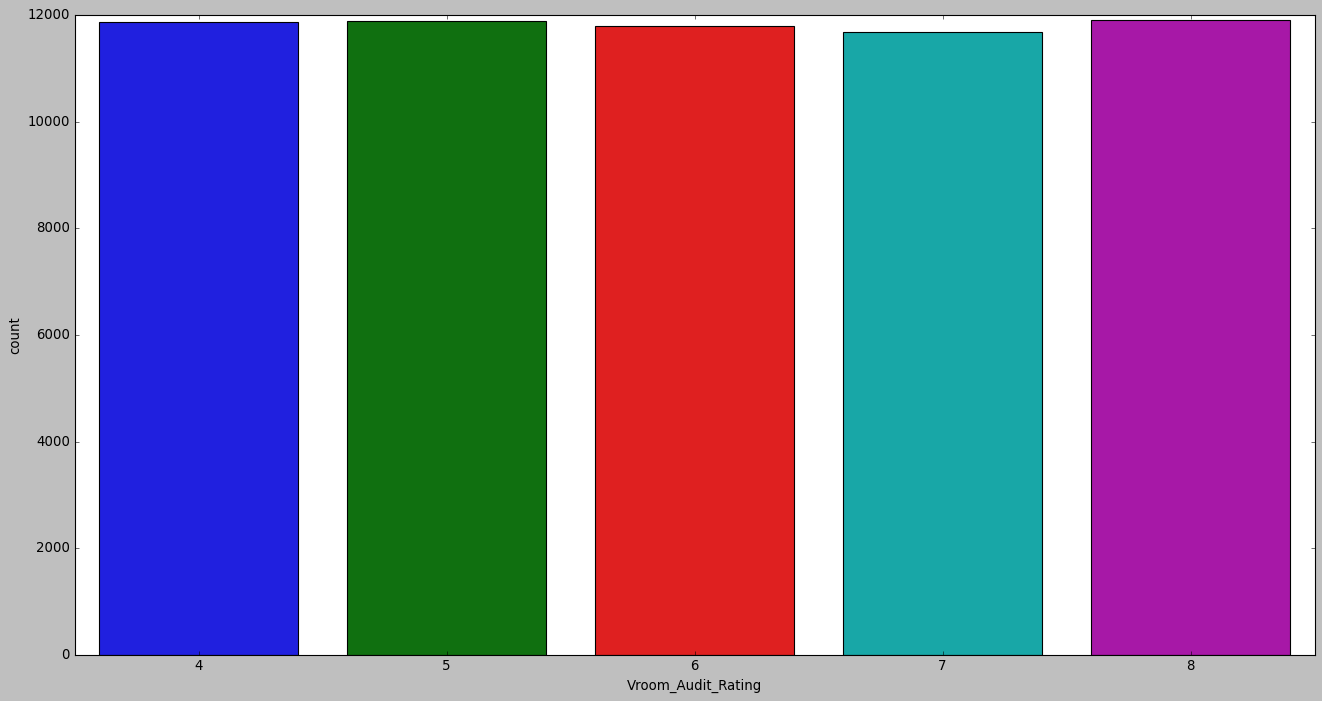

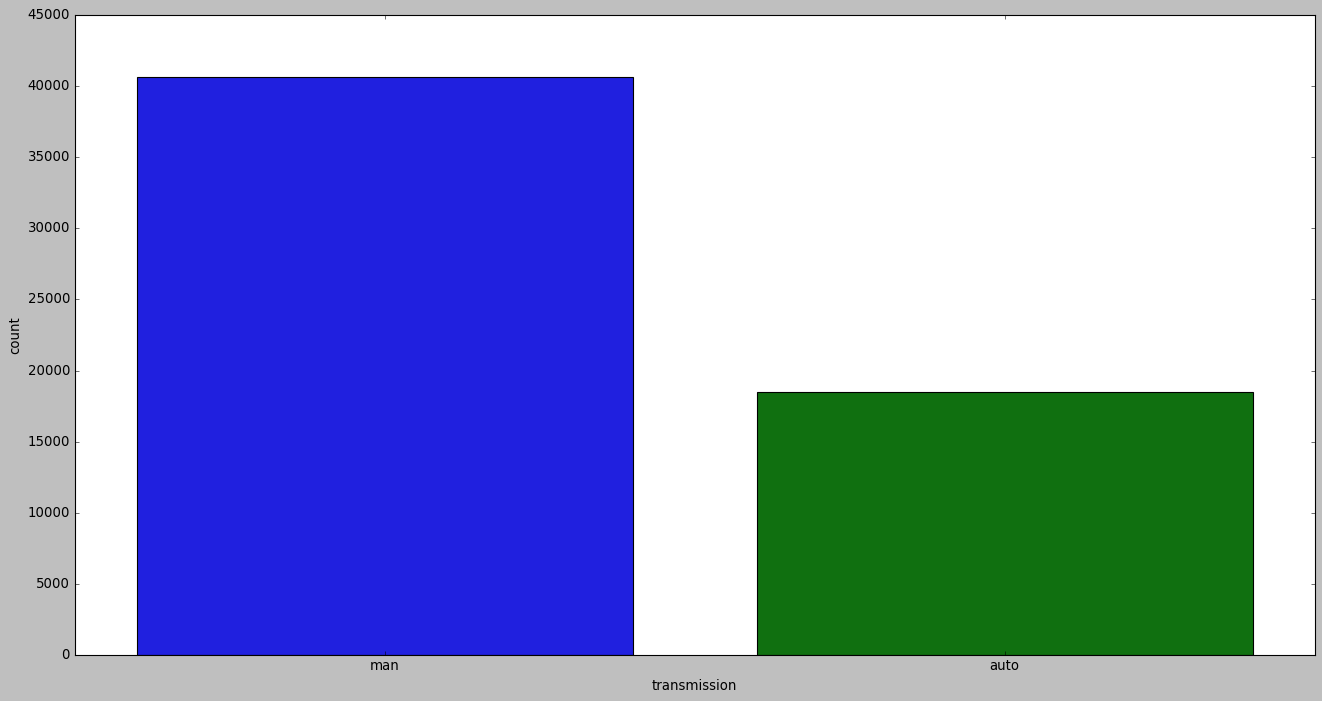

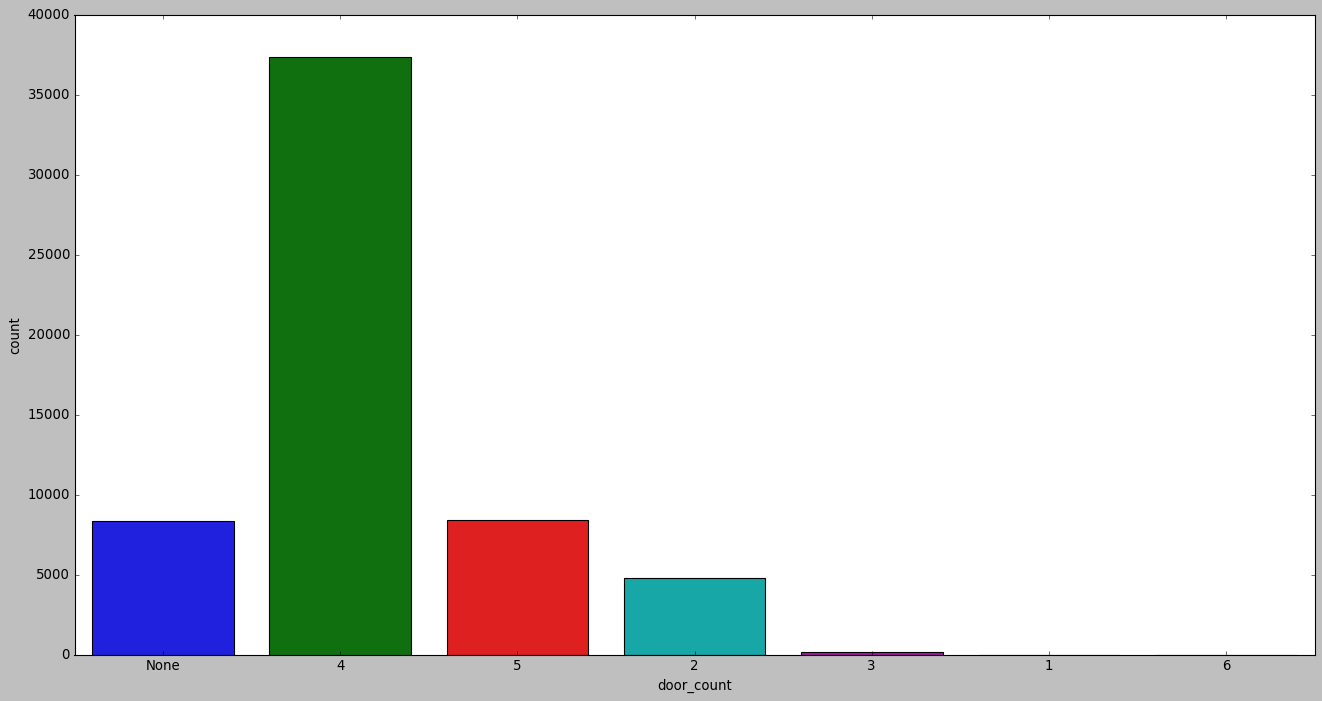

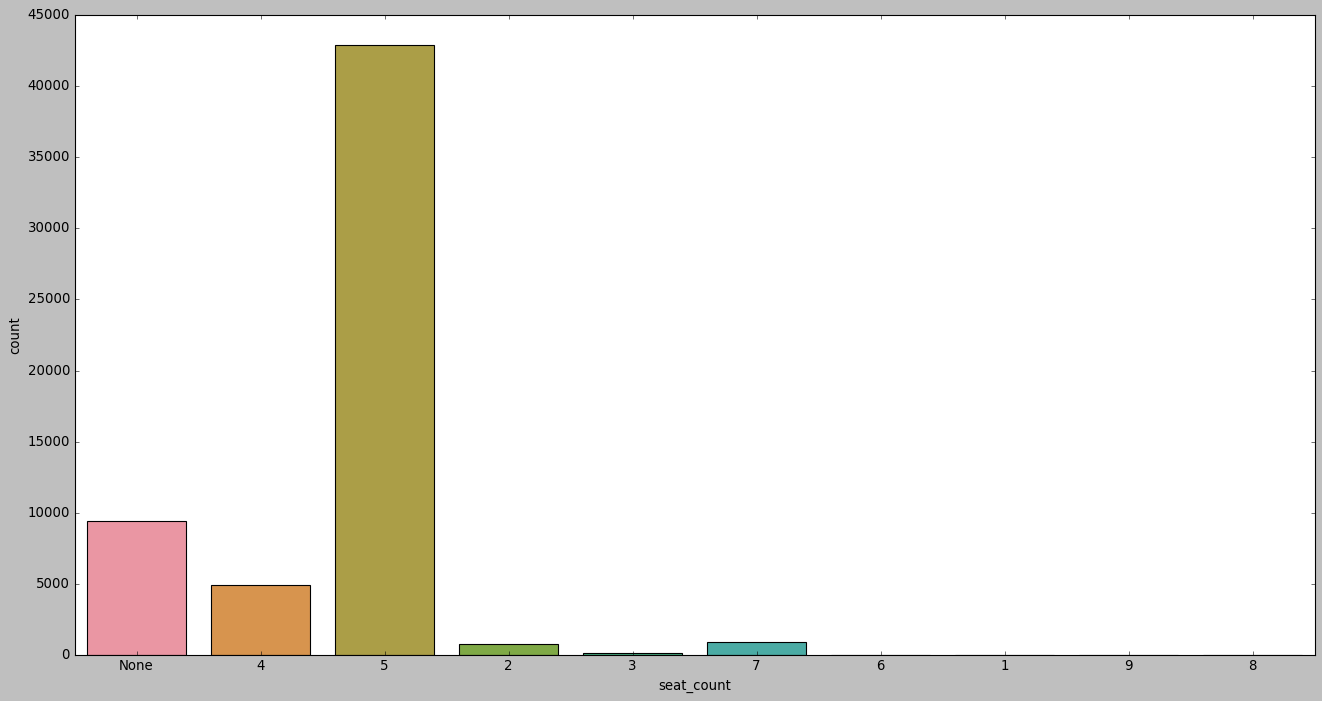

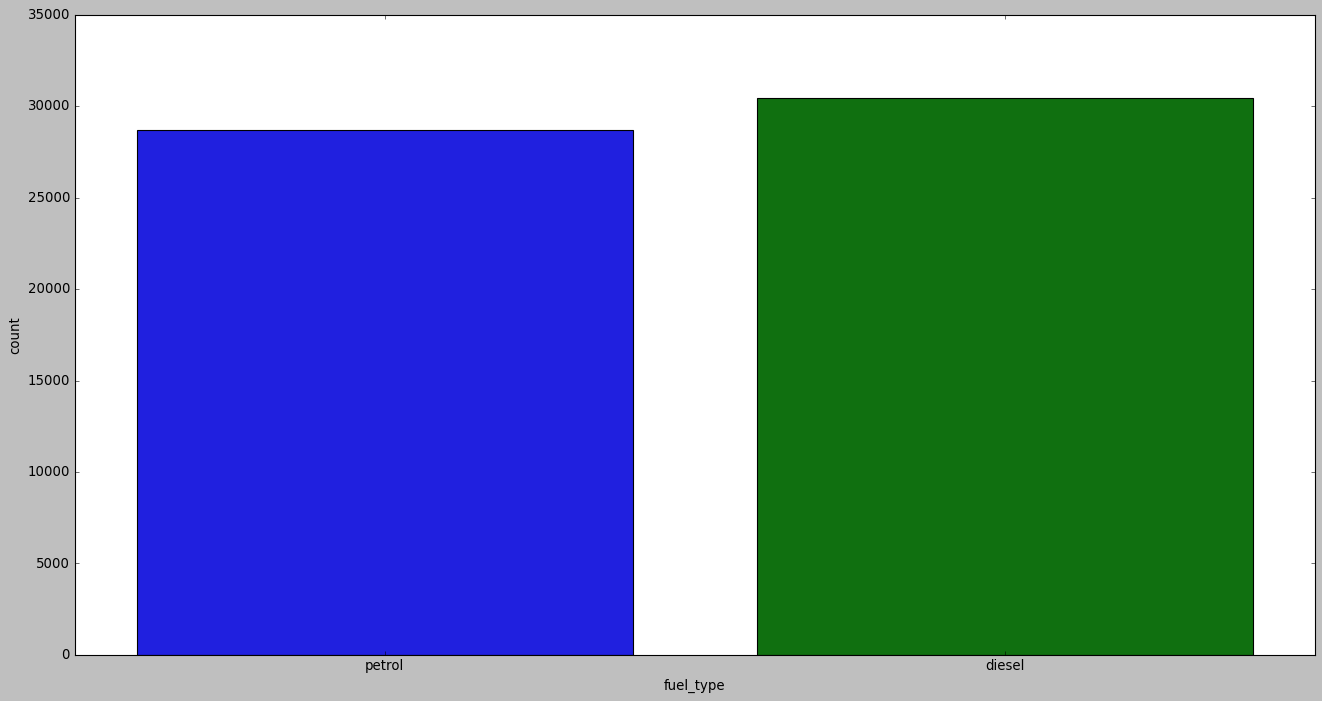

In [597]:
for column in df[cat].columns:
    plt.figure(figsize=(20,10))
    sns.countplot(df[column])
    plt.show()

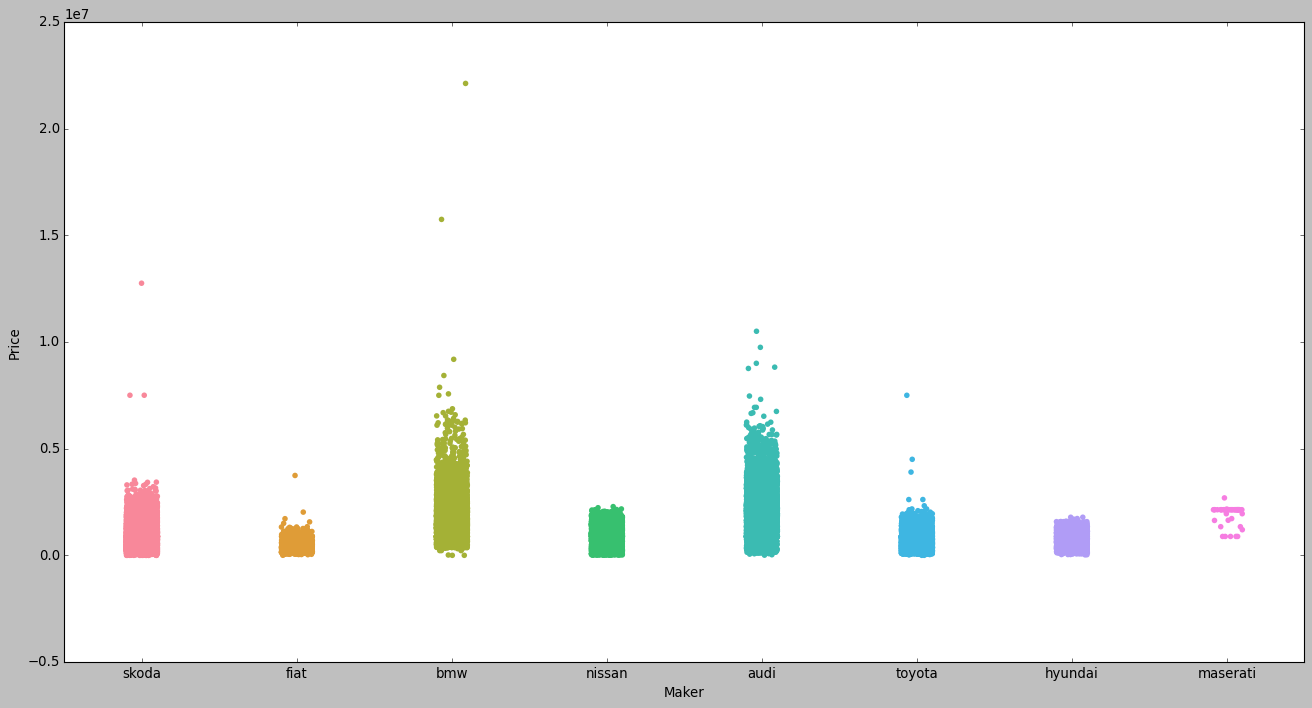

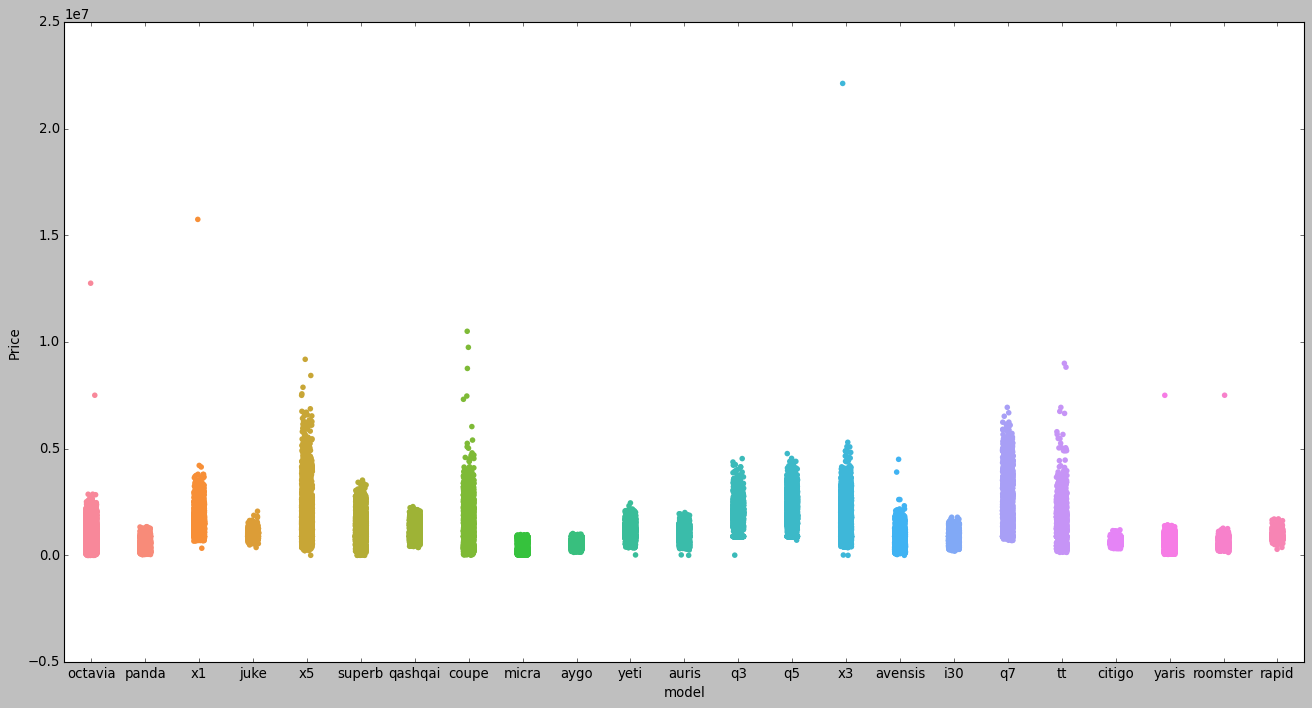

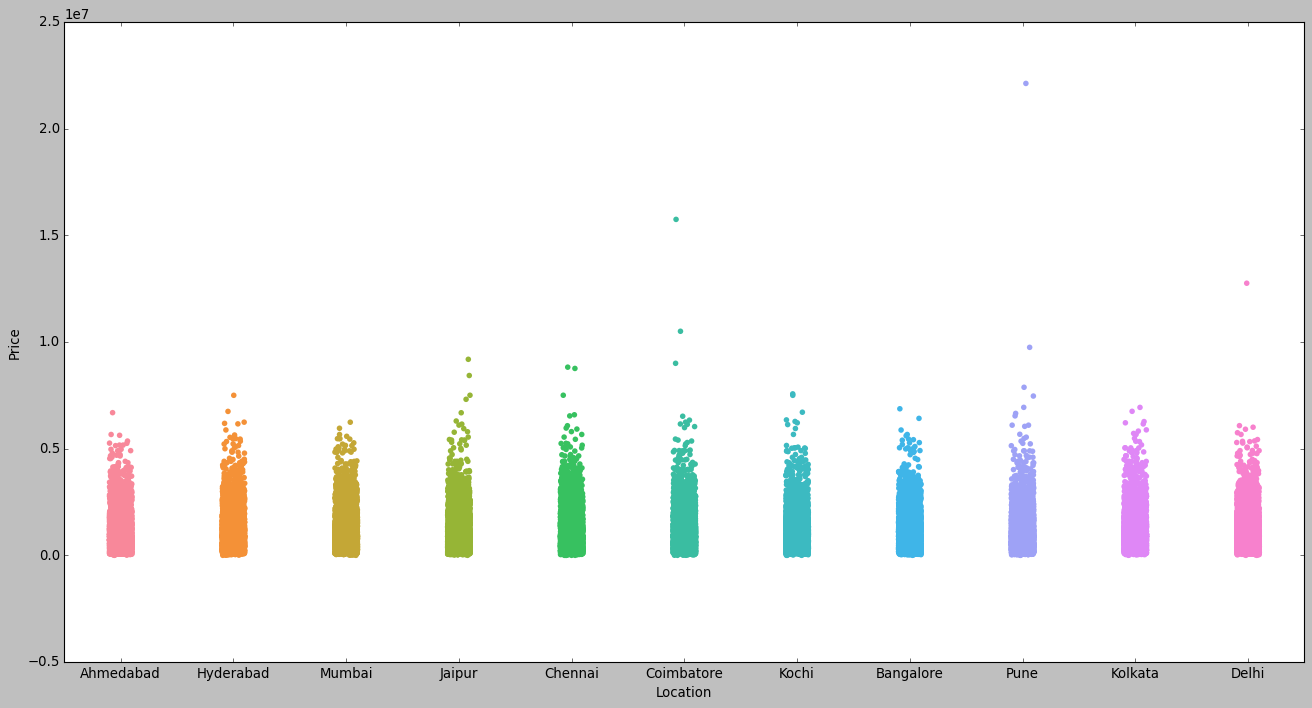

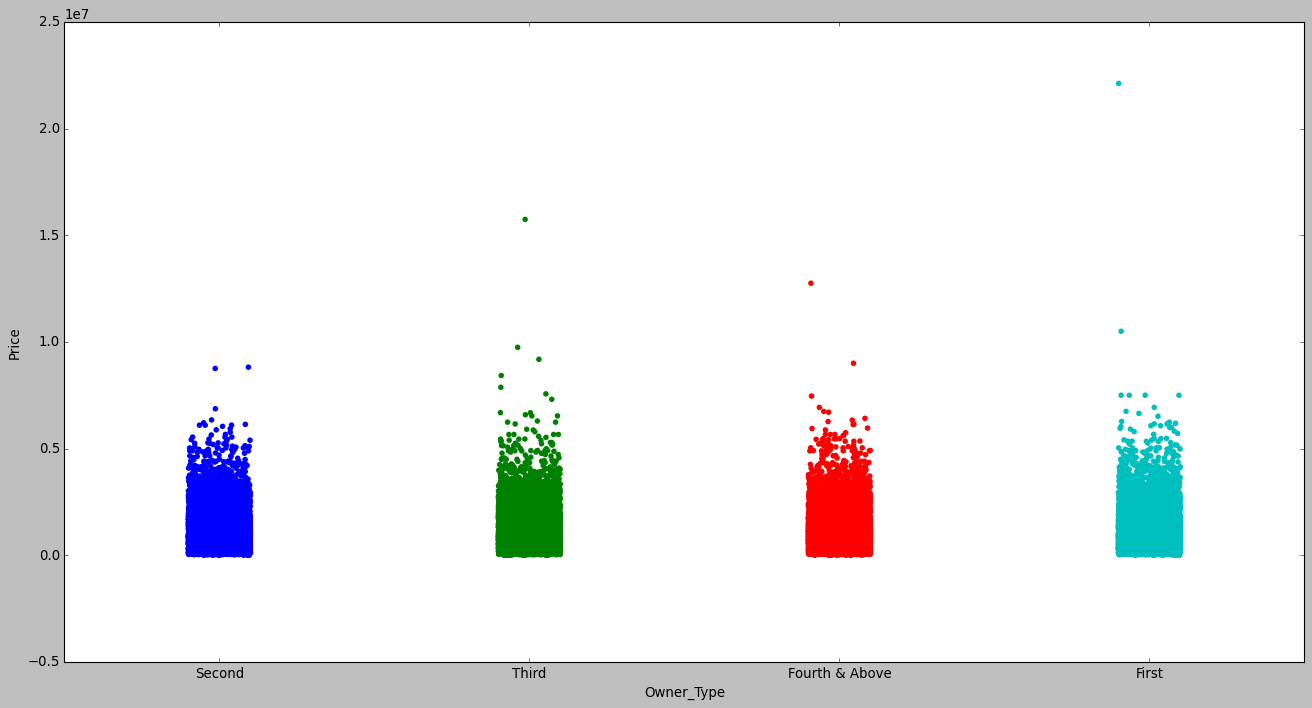

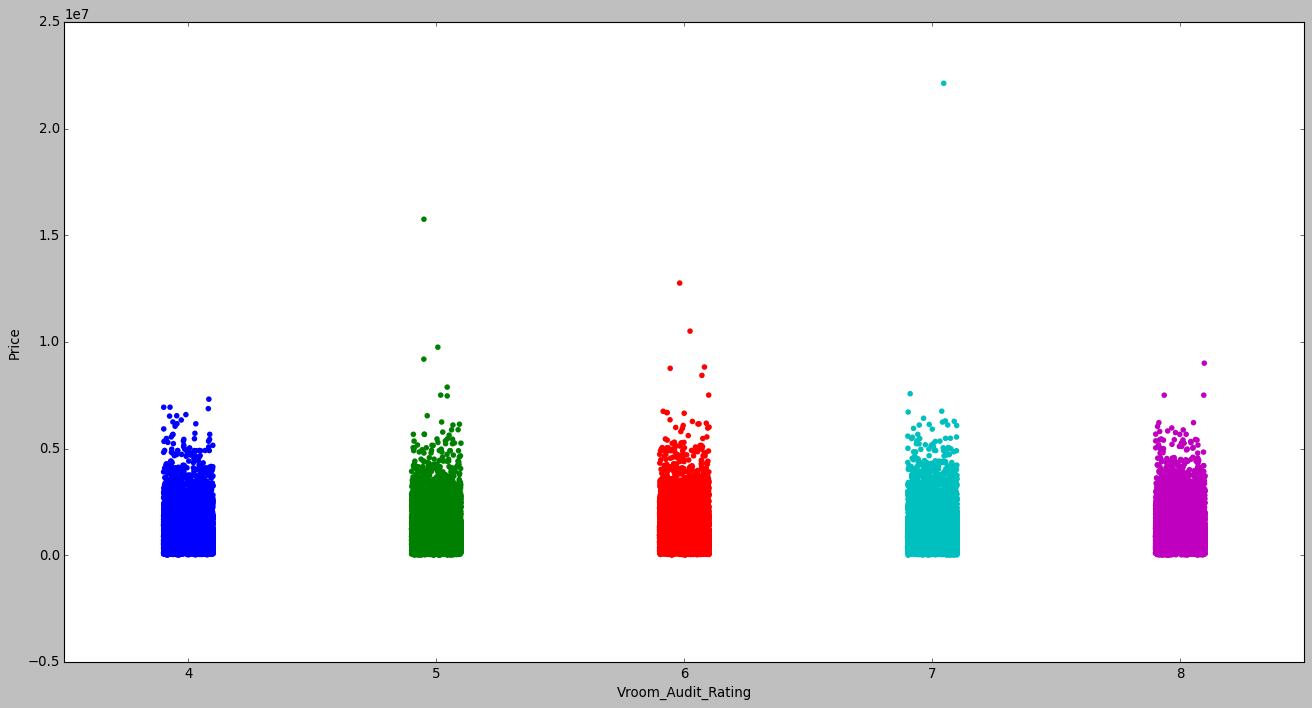

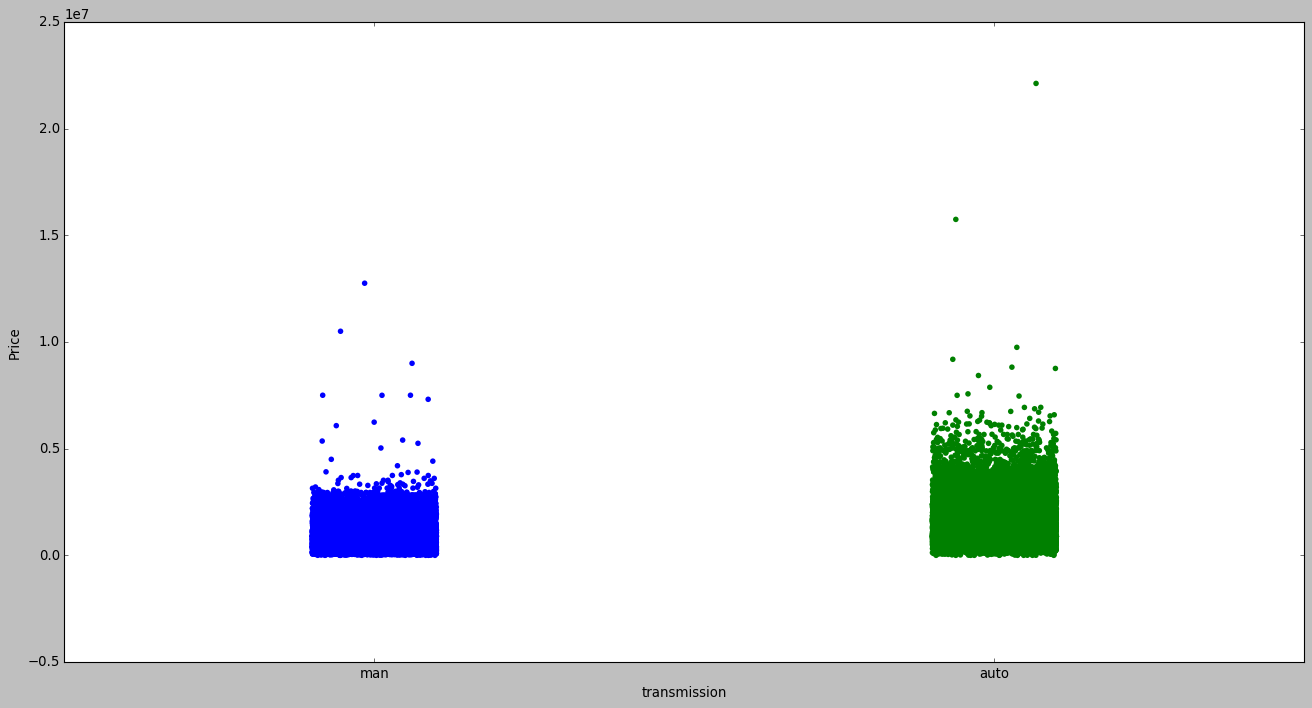

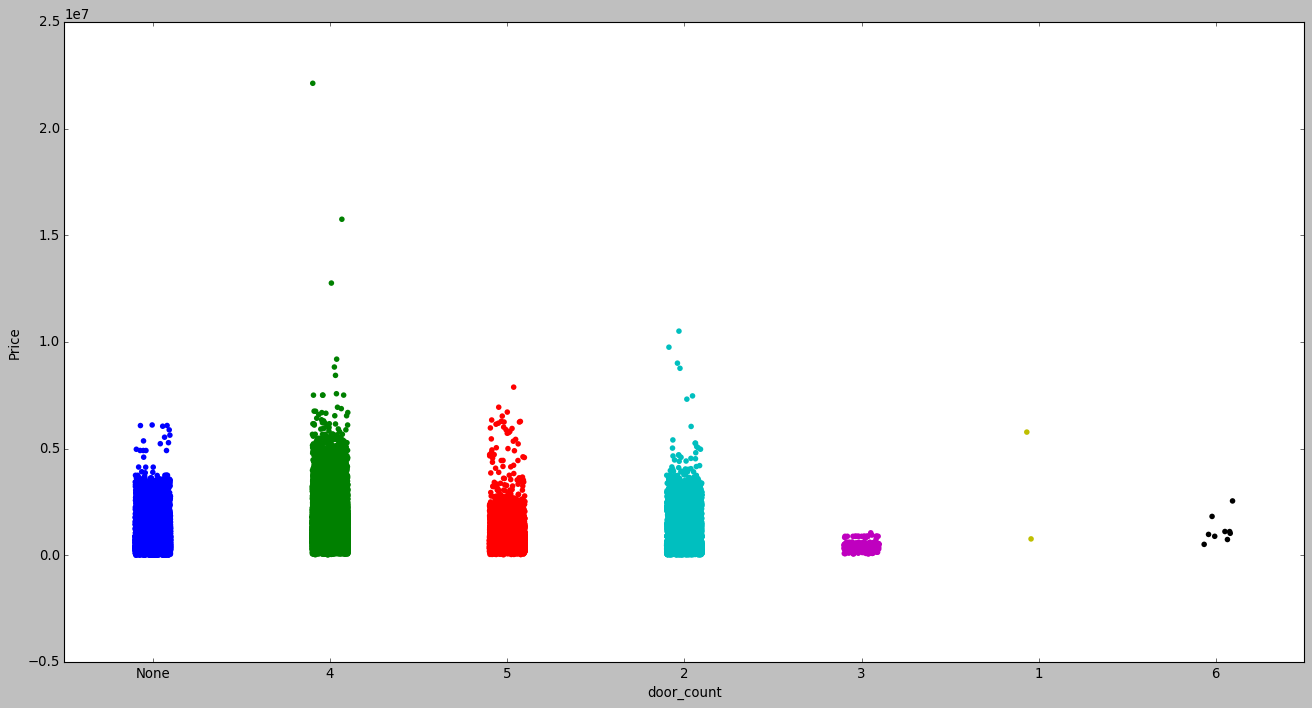

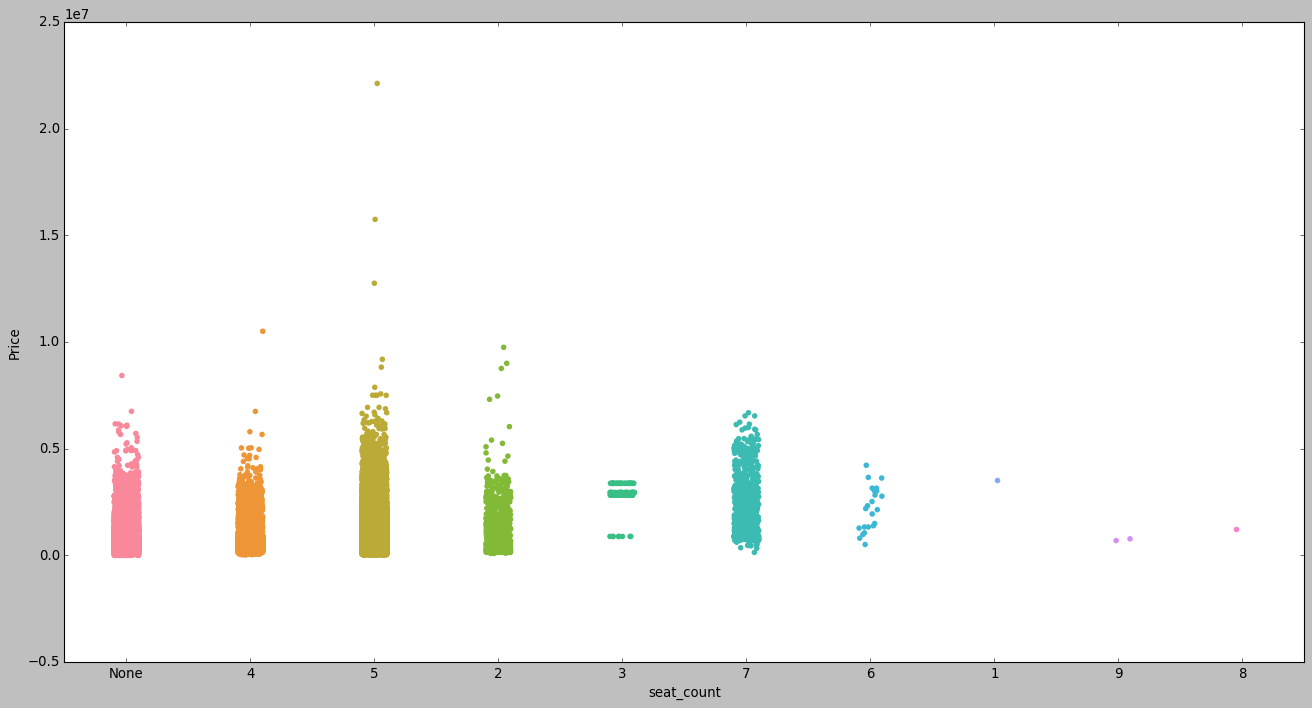

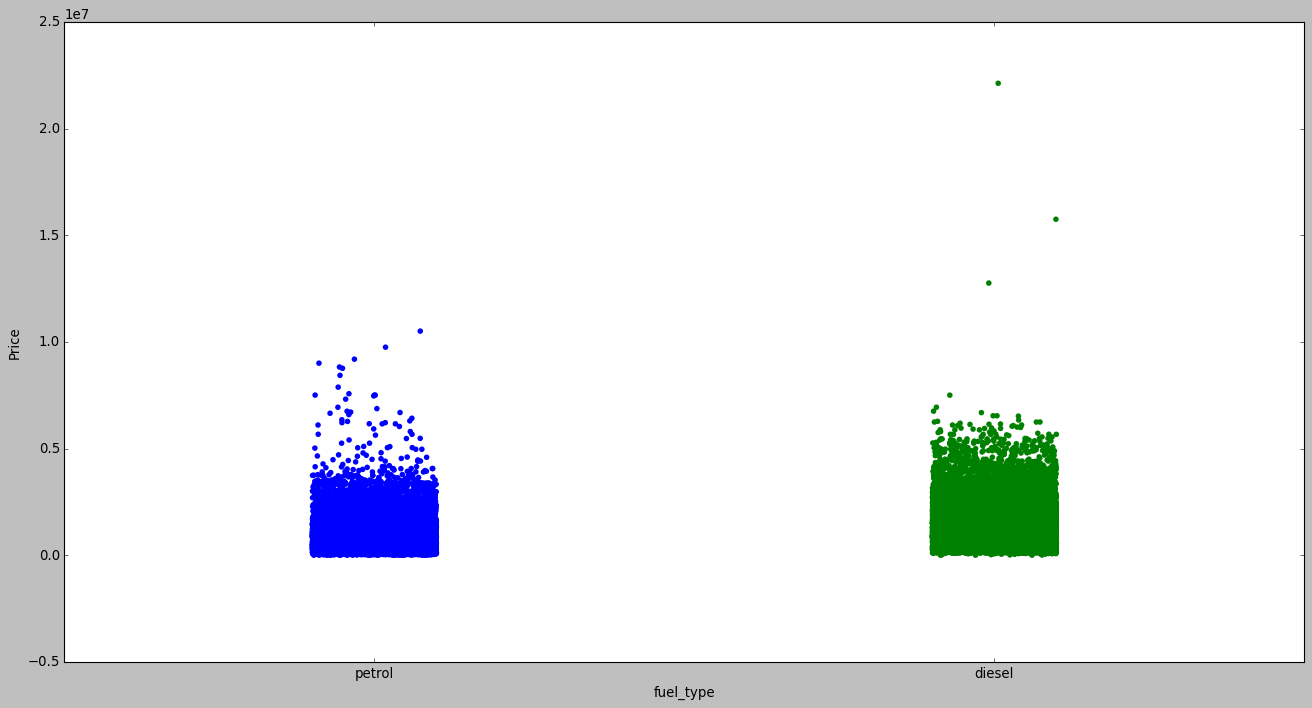

In [598]:
for column in df[cat].columns:
    plt.figure(figsize=(20,10))
    sns.stripplot(df[column], df['Price'], jitter=True) 
    plt.show()

### Correlation Plot

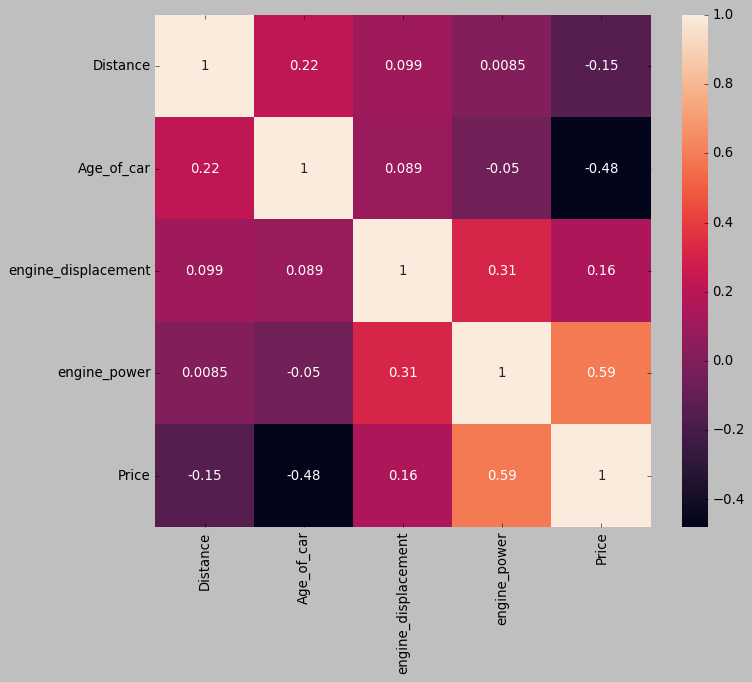

In [599]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

engine_power and Price are highly correlated. 

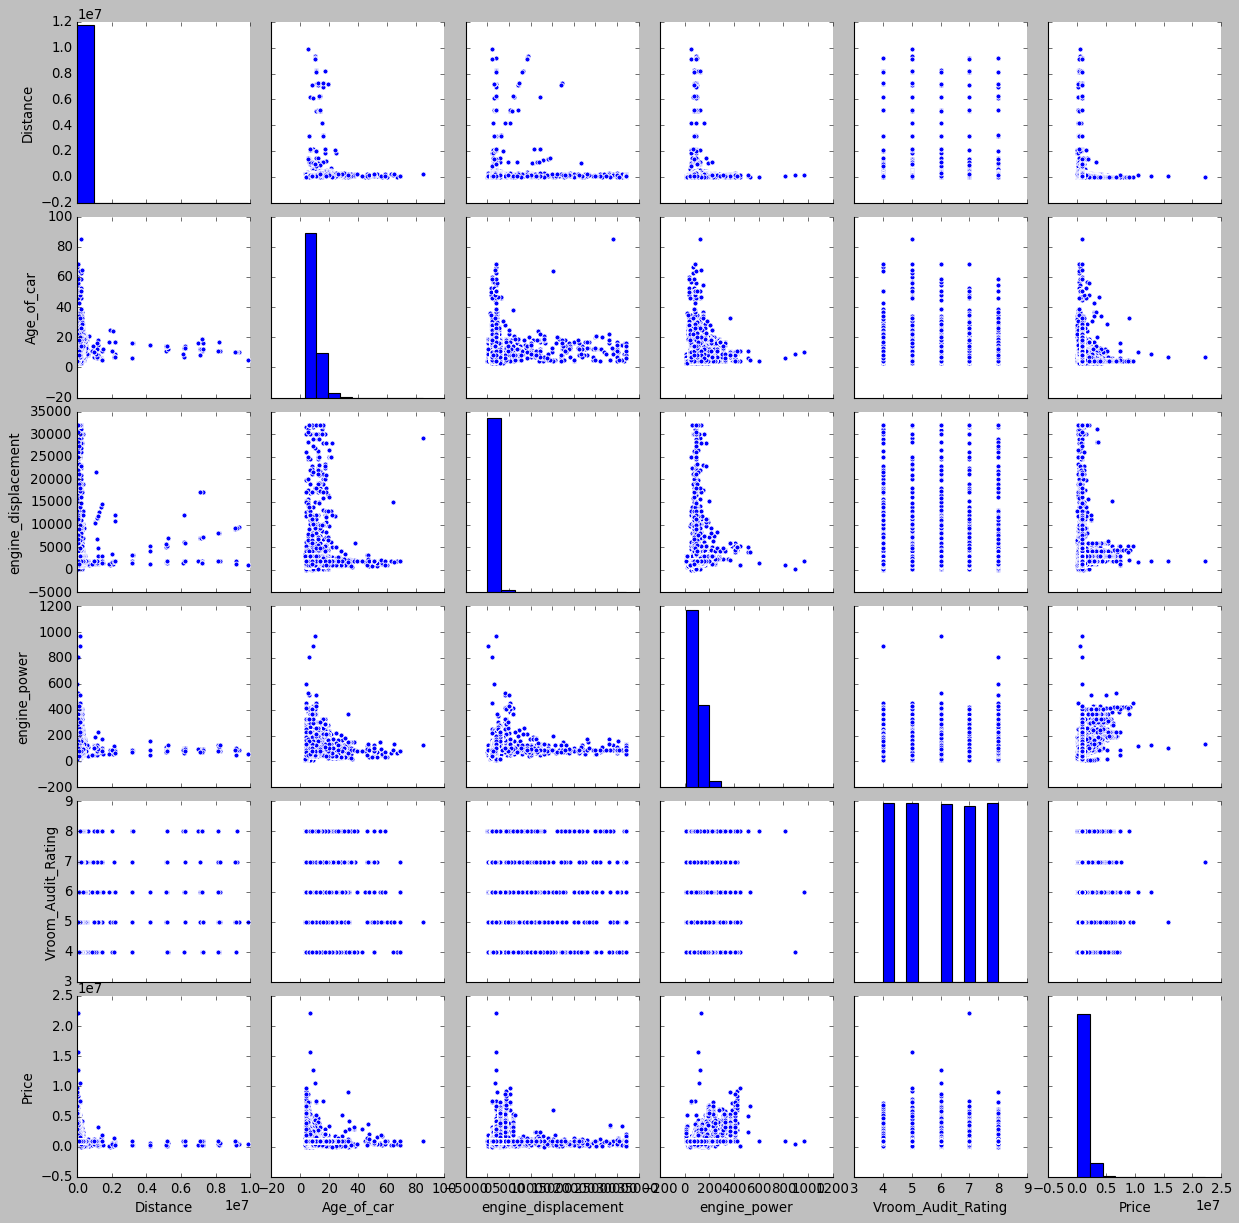

In [600]:
sns.pairplot(df)

#### None of the continuous variable shows a significant relationship with the target variable. The same needs to be checked in the final model.

In [601]:
#### get_dummies of the object variables

In [602]:
ord = ['Owner_Type', 'Vroom_Audit_Rating','door_count', 'seat_count']
nom = ['Maker', 'model', 'Location','transmission','fuel_type']

In [603]:
df = pd.get_dummies(df, columns=nom,drop_first=True)

In [604]:
le=LabelEncoder()
df.Owner_Type = le.fit_transform(df.Owner_Type)
df.Vroom_Audit_Rating = le.fit_transform(df.Vroom_Audit_Rating)
df.door_count = le.fit_transform(df.door_count)
df.seat_count = le.fit_transform(df.seat_count)

In [605]:
df.head()

,Distance,Owner_Type,Age_of_car,engine_displacement,engine_power,Vroom_Audit_Rating,door_count,seat_count,Price,Maker_bmw,...,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,transmission_man,fuel_type_petrol
0,65300.0,2,55,1964,147.0,4,6,9,543764.25,0,...,0,0,0,0,0,0,0,0,1,1
1,27750.0,3,7,1242,51.0,2,3,3,401819.25,0,...,0,0,0,0,0,0,0,0,1,1
2,46000.0,3,5,1995,105.0,3,3,4,2392855.50,1,...,0,0,1,0,0,0,0,0,0,0
3,43949.0,3,8,1618,140.0,3,3,4,958606.50,0,...,0,0,0,0,0,0,1,0,1,1
4,59524.0,1,7,2993,180.0,3,3,4,3085561.50,1,...,0,0,0,1,0,0,0,0,0,0


### Outlier Checks

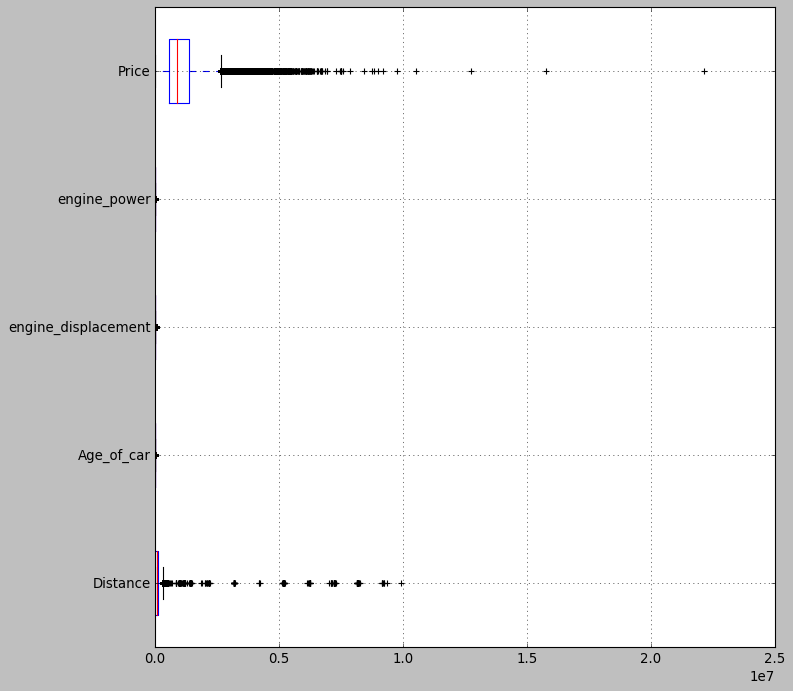

In [606]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)

Order as a target variable is not considered to check the outliers. We will do a log conversion of the target variable to take care of the skewness and to ensure that order magnitude is matched with the scaled dataset


In [607]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [608]:
num.remove('Price')

In [609]:
for column in df[num].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

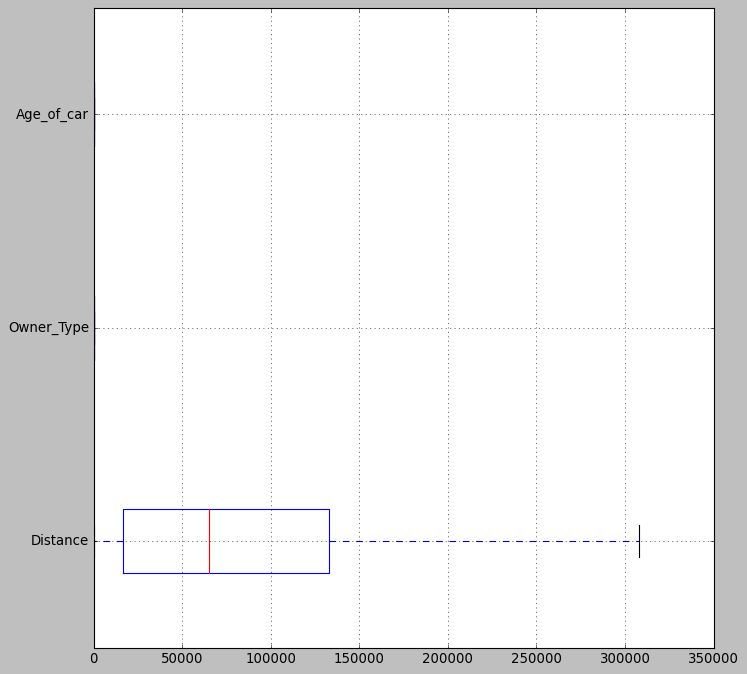

In [610]:
plt.figure(figsize=(10,10))
df.iloc[:, 0:3].boxplot(vert=0)

### Seperating Train and Test sets to the original values

In [611]:
df_train = df[0:53515]

In [612]:
df_test = df[53515:]

In [613]:
df_test = df_test.drop(['Price'], axis =1)

In [640]:
df_test.shape

(5615, 49)

### Scaling the continous variables in Train Set

In [614]:
from sklearn.preprocessing import StandardScaler

In [615]:
#Initialize an object for StandardScaler
std_scale = StandardScaler()

In [616]:
df_train['Distance'] = std_scale.fit_transform(df_train[['Distance']])
df_train['Age_of_car'] = std_scale.fit_transform(df_train[['Age_of_car']])
df_train['engine_displacement'] = std_scale.fit_transform(df_train[['engine_displacement']])
df_train['engine_power'] = std_scale.fit_transform(df_train[['engine_power']])

### Scaling the continous variables in Test Set

In [617]:
from sklearn.preprocessing import StandardScaler

In [618]:
#Initialize an object for StandardScaler
std_scale = StandardScaler()

In [619]:
df_test['Distance'] = std_scale.fit_transform(df_test[['Distance']])
df_test['Age_of_car'] = std_scale.fit_transform(df_test[['Age_of_car']])
df_test['engine_displacement'] = std_scale.fit_transform(df_test[['engine_displacement']])
df_test['engine_power'] = std_scale.fit_transform(df_test[['engine_power']])

In [620]:
# Copy all the predictor variables into X dataframe
X_train = df_train.drop('Price', axis=1)

# Copy target into the y dataframe. Target variable is converted in to Log. 
y_train = np.log1p(df_train[['Price']])

In [621]:
X_train.head()

,Distance,Owner_Type,Age_of_car,engine_displacement,engine_power,Vroom_Audit_Rating,door_count,seat_count,Maker_bmw,Maker_fiat,...,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,transmission_man,fuel_type_petrol
0,-0.227042,2,2.670601,0.355180,1.205830,4,6,9,0,0,...,0,0,0,0,0,0,0,0,1,1
1,-0.720829,3,-0.352630,-1.057021,-1.200821,2,3,3,0,1,...,0,0,0,0,0,0,0,0,1,1
2,-0.480839,3,-0.817743,0.415815,0.152920,3,3,4,1,0,...,0,0,1,0,0,0,0,0,0,0
3,-0.507810,3,-0.120074,-0.321581,1.030345,3,3,4,0,0,...,0,0,0,0,0,0,1,0,1,1
4,-0.302997,1,-0.352630,2.176177,2.033116,3,3,4,1,0,...,0,0,0,1,0,0,0,0,0,0


In [622]:
y_train.head()

,Price
0,13.206273
1,12.903760
2,14.687998
3,13.773237
4,14.942245


## Linear Regression

In [625]:
lr = LinearRegression()
lr_model = lr.fit(X_train,y_train)

In [631]:
lr_model.coef_[0]

array([-1.55059406e-01, -9.60624338e-04, -4.71056289e-01,  3.62916869e-02,
        1.28144673e-01, -1.02993286e-03, -1.10813381e-02, -1.23629825e-02,
        9.62647964e+09, -9.46512990e-02, -8.76856738e-01,  8.31864919e-01,
        3.14238284e+09,  2.28909239e+10,  8.28756187e+09,  8.25875700e-02,
       -4.12811874e-01, -1.46033621e+10,  8.28756187e+09,  8.28756187e+09,
        5.14517902e+09,  5.14517902e+09, -1.46033621e+10,  8.28756187e+09,
        8.28756187e+09,  8.28756187e+09,  8.28756187e+09,  5.14517902e+09,
       -1.46033621e+10, -1.46033621e+10, -1.46033621e+10,  8.28756187e+09,
       -1.33891777e+09, -1.33891777e+09, -1.33891777e+09, -1.75766058e-01,
       -1.46033621e+10,  2.63861443e-03, -3.00301570e-03,  5.78813712e-03,
        4.19293009e-03,  2.11799283e-03,  1.11525186e-02,  5.65002622e-03,
        7.91607954e-03, -1.47518815e-04,  5.64417186e-03, -8.96419469e-02,
       -9.92915932e-02])

In [628]:
for idx, col_name in enumerate(X_train.columns):
    print(idx)
    print(col_name)
    #print("The coefficient for {} is {}".format(col_name, np.round(lr_model.coef_[idx],2)))

0
Distance
1
Owner_Type
2
Age_of_car
3
engine_displacement
4
engine_power
5
Vroom_Audit_Rating
6
door_count
7
seat_count
8
Maker_bmw
9
Maker_fiat
10
Maker_hyundai
11
Maker_maserati
12
Maker_nissan
13
Maker_skoda
14
Maker_toyota
15
model_avensis
16
model_aygo
17
model_citigo
18
model_coupe
19
model_i30
20
model_juke
21
model_micra
22
model_octavia
23
model_panda
24
model_q3
25
model_q5
26
model_q7
27
model_qashqai
28
model_rapid
29
model_roomster
30
model_superb
31
model_tt
32
model_x1
33
model_x3
34
model_x5
35
model_yaris
36
model_yeti
37
Location_Bangalore
38
Location_Chennai
39
Location_Coimbatore
40
Location_Delhi
41
Location_Hyderabad
42
Location_Jaipur
43
Location_Kochi
44
Location_Kolkata
45
Location_Mumbai
46
Location_Pune
47
transmission_man
48
fuel_type_petrol


In [632]:
coef_df = pd.DataFrame({ 'columns' : X_train.columns,
                       'coef' : lr_model.coef_})
sorted_coef = coef_df.sort_values('coef', ascending = False)

Exception: Data must be 1-dimensional

In [ ]:
plt.figure(figsize = (10,20))
sns.barplot(x = "coef", y = "columns", data= sorted_coef)

In [ ]:
#X_train = X_train.drop('Instagram Popularity Quotient', axis=1)
#X_train = X_train.drop('Cuisine_indian,irish', axis=1)
#X_train = X_train.drop('Restaurant Theme_TheGem', axis=1)
#X_train = X_train.drop('Facebook Popularity Quotient', axis=1)
#X_train = X_train.drop('Food Rating', axis=1)
#X_train = X_train.drop('Service', axis=1)
#X_train = X_train.drop('days_since', axis=1)
#X_train = X_train.drop('train', axis=1)
#X_train = X_train.drop('City', axis=1)
#X_train = X_train.drop('Order Wait Time', axis=1)
#X_train = X_train.drop('Restaurant Theme_Flavors', axis=1)
#X_train = X_train.drop('Restaurant Type_Gastro Bar', axis=1)

#X_test = X_test.drop('Instagram Popularity Quotient', axis=1)
#X_test = X_test.drop('Cuisine_indian,irish', axis=1)
#X_test = X_test.drop('Restaurant Theme_TheGem', axis=1)
#X_test = X_test.drop('Facebook Popularity Quotient', axis=1)
#X_test = X_test.drop('Food Rating', axis=1)
#X_test = X_test.drop('Service', axis=1)
#X_test = X_test.drop('days_since', axis=1)
#X_test = X_test.drop('train', axis=1)
#X_test = X_test.drop('City', axis=1)
#X_test = X_test.drop('Order Wait Time', axis=1)
#X_test = X_test.drop('Restaurant Theme_Flavors', axis=1)
#X_test = X_test.drop('Restaurant Type_Gastro Bar', axis=1)

In [633]:
lr_model = lr.fit(X_train,y_train)

In [646]:
lr_train_prediction = lr_model.predict(X_train)
lr_test_prediction = np.exp(lr_model.predict(df_test))
#lr_test_prediction = np.expm1(lr_test_prediction)
lr_test_prediction

array([[ 389533.62126104],
       [ 951484.37254637],
       [1339378.9044898 ],
       ...,
       [ 298605.694424  ],
       [ 924792.54407087],
       [ 510790.06399988]])

In [647]:
RMSE_train = np.sqrt(mean_squared_error(y_train,lr_train_prediction))
print("The Root Mean Squared Error for train {}".format(RMSE_train))

The Root Mean Squared Error for train 0.3076513881358703


In [648]:
len(lr_test_prediction)

5615

In [649]:
len(solution_df)

5615

In [650]:
solution_df['Price'] = lr_test_prediction
solution_df

,ID,Price
0,21100001,3.895336e+05
1,21100002,9.514844e+05
2,21100003,1.339379e+06
3,21100004,2.585734e+06
4,21100005,3.110935e+06
...,...,...
5610,21105611,7.445700e+05
5611,21105612,3.094505e+05
5612,21105613,2.986057e+05
5613,21105614,9.247925e+05


In [651]:
solution_df.to_csv('Submission_v1.csv',index=False)